# Logistic Regression (Binary Classification)

In [22]:
import pandas as pd
from plotnine import *

##### We will use the iris data set

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


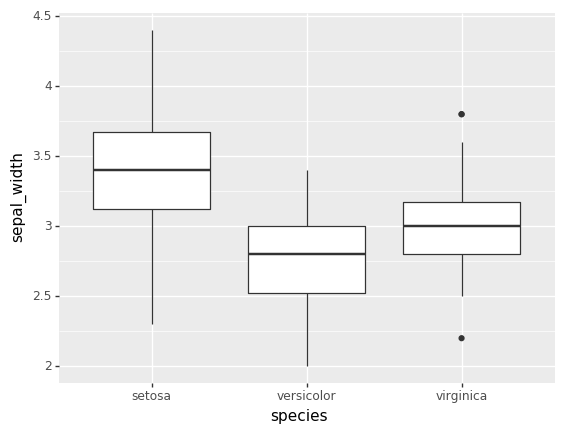

<ggplot: (-9223371922865843498)>

In [23]:
iris = pd.read_csv("iris.csv")
print(iris.head())
ggplot(iris,aes(x="species",y='sepal_width'))+geom_boxplot()

##### Setosa flowers are more distinct from the other two species in terms of sepal width

##### We know that the data set has 3 classifications of the flower, let's make it a binary classification by adding an isSetosa attribute

In [24]:
iris['isSetosa'] = iris['species'] == 'setosa'
iris['isSetosa'] = iris['isSetosa'].map({False:0,True:1})

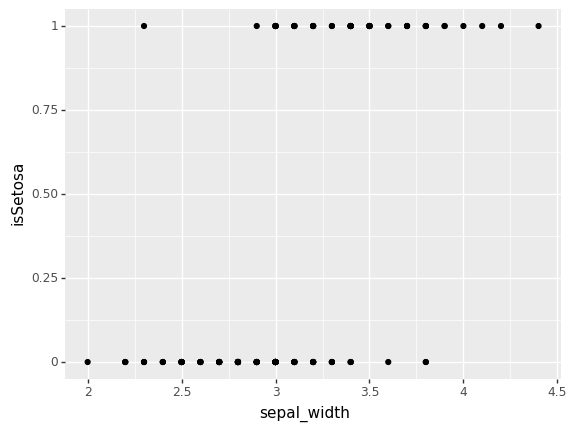

<ggplot: (-9223371922865841341)>

In [25]:
ggplot(iris,aes(x='sepal_width',y='isSetosa'))+geom_point()

##### Notice how the data is spread across sepal width, small sepal width means not Setosa, larger sepal width means Setosa

##### Let's see what will happen if we fit a Linear Regression model on this data

In [26]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(iris[['sepal_width']],iris[['isSetosa']])
iris['lm_fit'] = lm.predict(iris[['sepal_width']])
lm.score(iris[['sepal_width']],iris[['isSetosa']]) # r-squared value

0.3547403668349245

##### And here is what the best fit line looks like

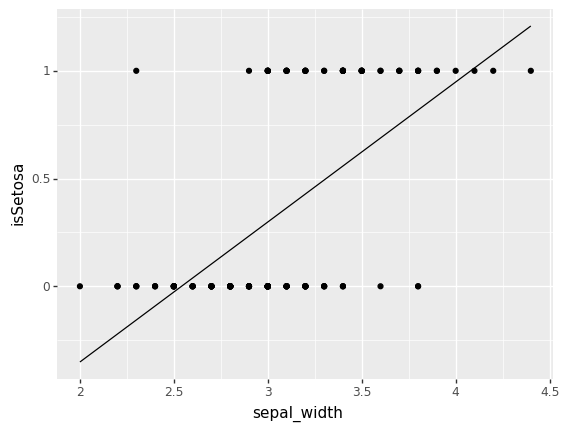

<ggplot: (113988934450)>

In [27]:
ggplot(iris,aes(x='sepal_width',y='isSetosa'))+geom_point()+geom_line(aes(y="lm_fit"))

##### As we can see, the linear regression model fails to fit the data, so we can now try the Logistic Regression model which predicts the probability of a flower to belong to the Setosa species

##### Splitting data into training and testing sets

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris[['sepal_width']], iris['isSetosa'], test_size=0.2, random_state=0)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(120, 1) (120,)
(30, 1) (30,)


##### And now loading the model and fitting it on the data

In [29]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

##### Predicting species for our test set and using it to calculate the accuracy

In [30]:
from sklearn.metrics import accuracy_score

predictions = logmodel.predict(X_test)
print(accuracy_score(y_test, predictions))

0.9


##### An important check for a model is to see the confusion matrix generated

In [31]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[19  0]
 [ 3  8]]


##### The matrix tells us that the model successfully predicted no-setosa for 19 flowers out of 19, but only predicted setosa for 8 out of 11 flowers. So it is very good at predicting if a flower is not Setosa, which isn't quite what we wanted!

##### Here's a way to visualize the Confusion Matrix for binary classification

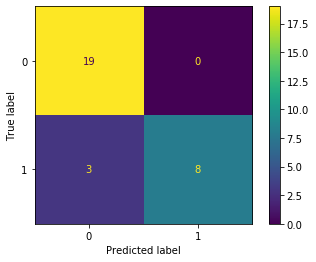

In [32]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(logmodel,X_test,y_test)

##### How about we use sepal width and length attributes to predict the classification?

In [33]:
X_train, X_test, y_train, y_test = train_test_split(iris[['sepal_width','sepal_length']], iris['isSetosa'], test_size=0.2, random_state=0)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(120, 2) (120,)
(30, 2) (30,)


In [34]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

predictions = logmodel.predict(X_test)
print(accuracy_score(y_test, predictions))

1.0


##### That's a 100% accuracy!

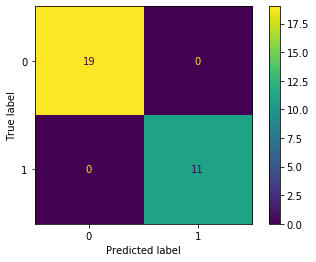

In [35]:
plot_confusion_matrix(logmodel,X_test,y_test)

### We can even predict multiclass data using Logistic Regression!

##### Using all 4 attributes to predict the 3 species

In [36]:
X_train, X_test, y_train, y_test = train_test_split(iris.iloc[:,0:4], iris['species'], test_size=0.2, random_state=0)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(120, 4) (120,)
(30, 4) (30,)


In [37]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

predictions = logmodel.predict(X_test)
print(accuracy_score(y_test, predictions))

1.0


c:\python36\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


##### 100% accuracy!

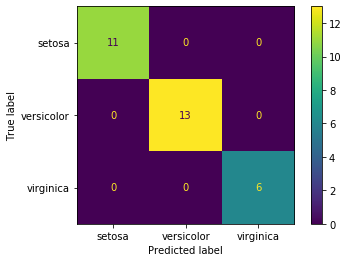

In [38]:
plot_confusion_matrix(logmodel,X_test,y_test)

## Confusion Matrix (Measures)

### Recall
* TP / (TP+FN)
* Out of all the positive classes, how much we predicted correctly. Should be as high as possible

In [18]:
metrics.recall_score(y_test,predictions,average='weighted')

1.0

### Precision 
* TP / (TP + FP)
* Out of all the positive classes we have predicted correctly, how many are actually positive

In [19]:
metrics.precision_score(y_test,predictions,average='weighted')

1.0

### Accuracy
* (TP+TN) / Total
* Out of all classes, how much did we predict correctly

In [20]:
accuracy_score(y_test, predictions)

1.0